In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [3]:
# Modelling randomness of assets over time. 

class StochasticProcess:
  def time_step(self):
    dW = np.random.normal(0, math.sqrt(self.delta_t))
    dS = self.drift*self.delta_t*self.current_asset_price + self.volatility*self.current_asset_price*dW
    self.asset_prices.append(self.current_asset_price + dS)
    self.current_asset_price = self.current_asset_price + dS

  def __init__(self, drift, volatility, delta_t, intial_asset_price):
    self.drift = drift
    self.volatility = volatility
    self.delta_t = delta_t
    self.current_asset_price = intial_asset_price
    self.asset_prices = [intial_asset_price]

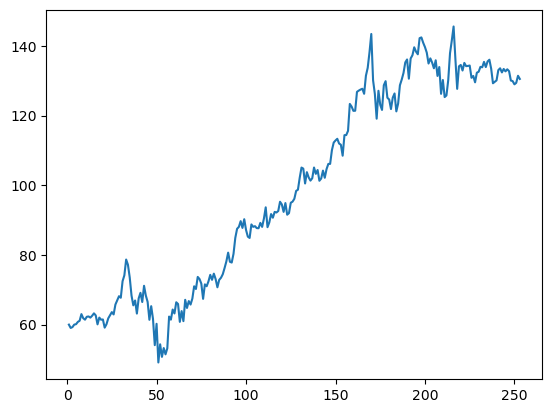

In [4]:
start = datetime(2020,1,1)
end = datetime(2021,1,1)

nvda = pdr.get_data_yahoo("NVDA", start, end)
close = nvda['Close']
time = np.linspace(1, len(close), len(close))
plt.plot(time, close)
plt.show()
plt.close()


In [13]:
def daily_return(close):
  returns = []
  for i in range(0, len(close)-1):
    today = close[i+1]
    yday = close[i]
    daily_return = (today - yday)/yday
    returns.append(daily_return)
  return returns

returns = daily_return(close)

mu = np.mean(returns)*252
sig = np.std(returns)*np.sqrt(252.)

print(mu,sig)

0.9471924906752742 0.578024234140276


In [24]:
processes = []
for i in range(0,100):
  processes.append(StochasticProcess(0.9471924906752742,0.578024234140276,1/252,close[0]))

tte = 1
for process in processes:
  while(tte - process.delta_t) > 0:
    process.time_step()
    tte = tte - process.delta_t

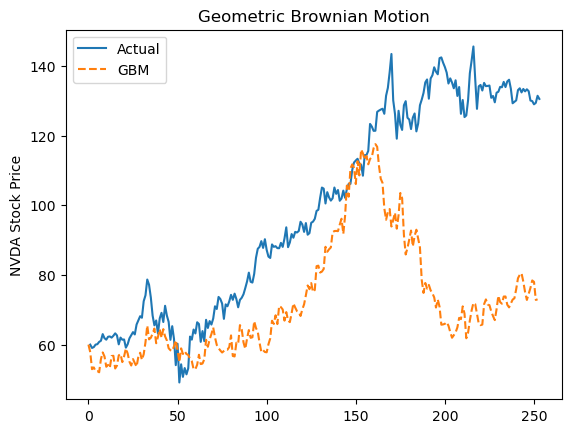

In [25]:
plt.plot(time, close, label='Actual')
plt.plot(np.arange(0, len(processes[0].asset_prices)), processes[0].asset_prices, label='GBM', ls='--')
plt.ylabel('NVDA Stock Price')
plt.title('Geometric Brownian Motion')
plt.legend(loc = 'upper left')
plt.show()
plt.close()